# Gradient Boosting Machine for Regression

Table of Content:

* [Boosting Methodology](#methodology)

* [Gradient Boosting Machine for Regression](#model)

* [An example of Gradient Boosting Machine for Regression](#example)

---

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## <a id='methodology'>Boosting Methodology</a>

Boosting, like bagging, is another type of ensemble method, but unlike bagging, does not involve bootstrap sampling. The main idea of boosting is to combine several weak classifiers into a strong classifier. It add a weak classifer to the ensemble at a time and the newly added classifer is trained to improve upon the current model. Boosting can be used with any kinds of classifers. Each weak classifer can be for example, knn, decision tree...etc.

Typically, boosting method is used combining with decision tree. Let see how boosting works step by step.
You are given (x1, y1),(x2, y2), ...,(xn, yn), and the task is to fit a model F(x) to minimize square loss. Suppose your friend wants to help you and gives you a model F. You check his model and find the model is good but not perfect. There are some mistakes: F(x1) = 0.8, while y1 = 0.9, and F(x2) = 1.4 while y2 = 1.3... How can you improve this model?

You wish to improve the model such that
```
F(x1) + h(x1) = y1
F(x2) + h(x2) = y2
...
F(xn) + h(xn) = yn
```

Or, equivalently, you wish
```
h(x1) = y1 − F(x1)
h(x2) = y2 − F(x2)
...
h(xn) = yn − F(xn)
```

Apparently, we can not find the perfect ```h(xi)``` in one shot, but some regression tree might be able to do this approximately. We can do this by fitting a regression tree h to data
```
(x1, y1 − F(x1)),(x2, y2 − F(x2)), ...,(xn, yn − F(xn))
```

```yi − F(xi)``` are called residuals. These are the parts that existing model F cannot do well. The role of h is to compensate the shortcoming of existing model F. If the new model F + h is still not satisfactory, we can add another
regression tree. Gradually, the final model will be closer to what we want.

How does this related to gradient descent? Let's first talk a little bit about what gradient descent is.

**Gradient Descent**

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point. Let's give an example to better understand it. Assume we have $n$ observstions $(x_i, y_i)$ and have a function $J$, which is a function as follows

$$J = \sum_{i}^{n} L(y_i, F(x_i))$$

where 
```
* L is the loss function calculated using the ith observation (xi, yi). 
* F is the function of the model that we want to build up.
```

If F is a function of $\theta$s, how do we use gradient descent to find all the $\theta$s for our model?
We can treat $J$ as a function of $\theta$. We can then start with some $\theta$, say $\theta_0=\bar0$, and keep changing $\theta$ to reduct $J(\theta)$. More formally, 

$$\theta_{i}^{b+1} = \theta_{i}^{b} - \rho \frac{\partial J(\theta)}{\partial \theta_i^{b}}$$

```
where
* J: the overall loss function additively calculated from all observations with regard to F
* θi: the ith parameter for the model
* b: the iteration count number. If b = 10, it means the value of the parameter is generated from the 10th iteration.
* rho: the learning rate
```
<img src="../_pic/gradient_descent.png" width="200">

In our case, what is the gradient descent formula for boosting?
We want to minimize $J = \sum_{i}^{n} L(y_i, F(x_i))$ by adjusting ```F(x1), F(x2), ..., F(xn)```. Notice that ```F(x1), F(x2), ..., F(xn)``` are just some numbers. We can treat ```F(xi)``` as parameters and take derivatives


$$F(x_i)^{b+1} = F(x_i)^{b} - \rho \frac{\partial J}{\partial F(x_i)}$$

## <a id='model'>Gradient Boosting Machine for Regression</a>

Suppose we use least square function as our Loss function, which is not uncommon:  
$$L(y, F(x)) = \frac{1}{2}(y − F(x))^2$$

Then the partial derivative of $J$ on $F(x_j)$ will be 

$$\frac{\partial J}{\partial F(x_j)}= \frac{\partial \sum_{i}^{n} L(y_i, F(x_i))}{\partial F(x_j)} = -(y_j − F(x_j)) =
F(x_j) - y_j$$

Recall from the previous section, the residual for the jth observation is $r_j = y_j − F(x_j)$. Therefore, residual is equals to negative gradient, i.e. :

$$ y_j − F(x_j) = -\frac{\partial J}{\partial F(x_j)}$$

In other words, when we are trying to fit a model h on our residual, we are actually fit a h on negative gradient. Also, when we update our final F by adding F+h, we are actually update F by adding F+the model built on negative gradient. Surprisingly, we are actually updating our model using the model we built on gradient descent. More formally,

$$
F(x_i)^{b+1} = F(x_i)^{b} + h(x_i)  \\
 \quad\quad\quad\quad\quad\quad = F(x_i)^{b} + (y_i − F(x_i)^b) \\
 \quad\quad\quad\quad\quad = F(x_i)^{b} - \frac{\partial J}{\partial F(x_i)^b}
$$

We can see that the formula is almost the same as the formula of gradient descent, except that the learning rate $\rho$ equals 1. In practice, it turns out that Gradient Boosting Machine is more prone to overfitting. Therefore, instead of using 1 as learning rate, we use a smaller number, such as 0.01, or 0.001 to train the model. In short, we try to update $F(x_j)$ in order to minimize our cost function J. The way we update our $F(x_j)$ is by adding the residual of the current F(x_j) to the actual $y$ to the current model itself. The reason why we use residual as the way of updating the parameter for gradient descent is describe in the paragraph above.

To sum up, to build a gradient boosting machine, the process is:

1. use response as the original resudual

2. Iterate until converge

    2.1 fit a model h, using X and residual. For GBRT, the model we use is Decision Tree. Note that we will denoted our first model as F in step 2.2
    
    2.2 Using the shrinkage parameter and the model h to update on the residual. The updated residual is calculated as $residual = residual - shrinkage \times h.predict(X)$. The model we built until this step is $F:= F + \rho * h$.
    
Note:
* The number of tree we generates is the number of iterations in the second step. In the second step, when building a model on residual, it is essentially the same as build a model on negative gradient. That's why it is called gradient boosting machine.
* Also, the final model $F$, is the addition of all the models generates in each iteration. For example, if our number of iteration is 100, when making a prediction, we will need to firstly make prediction using the first model, and the predicted output from the first model will be $shrinkage \times predicted_output$. The final prediction will be the sum of $shrinkage \times predicted_output$ using the same X.

[The post from Ethen](http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/trees/gbm/gbm.ipynb) give as simple example to explain the whole process of a boosting machine:

>let's conside an example using made up numbers. Suppose we have 5 observations, with responses 10, 20, 30, 40, 50. The first tree is built and gives predictions of 12, 18, 27, 39, 54 (these predictions are made up numbers). If our learning rate ηη = 0.1, all trees will have their predictions scaled down by ηη, so the first tree will instead "predict" 1.2, 1.8, 2.7, 3.9, 5.4. The response variable passed to the next tree will then have values 8.8, 18.2, 27.3, 36.1, 44.6 (the difference between the prediction that was scaled down by the prediction and the true response). The second round then uses these response values to build another tree - and again the predictions are scaled down by the learning rate ηη. So tree 2 predicts say, 7, 18, 25, 40, 40, which, once scaled, become 0.7, 1.8, 2.5, 4.0, 4.0. As before, the third tree will be passed the difference between these values and the previous tree's response variable (so 8.1, 16.4, 24.8, 32.1. 40.6). And we keep iterating this process until we finished training all the trees (a parameter that we specify), in the end, the sum of the predictions from all trees will give the final prediction.


The advantages of GBRT are:
* Natural handling of data of mixed type (= heterogeneous features)
* Predictive power
* Robustness to outliers in output space (via robust loss functions)

The disadvantages of GBRT are:
* Scalability, due to the sequential nature of boosting it can hardly be parallelized.

## <a id='example'>An example of Gradient Boosting Machine for Regression</a>

In practice, when fitting a GBRT, the most important parameters for GBRT are:

* **n_estimators**: The number of boosting stages to perform. One of the most important parameter.
* **max_depth**: Depth of each individual tree. One of the most important parameter. 
* **loss**: Loss function. One of the most important parameter.
* **learning_rate**: default=0.1. learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. This parameter is the the shrinkage parameter **$\rho$** mentioned prevoisly.
* **min_samples_split**: The minimum number of samples required to split an internal node.
* **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
* **subsample**: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
* **max_features**: The number of features to consider when looking for the best split. Choosing max_features < n_features leads to a reduction of variance and an increase in bias. The idea of choosing max_features < n_features is the same as random forest.
* **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Default 0.

Some parameter that we wouldn't change are:
* **criterion**: The function to measure the quality of a split. Supported criteria are “friedman_mse” for the mean squared error with improvement score by Friedman, “mse” for mean squared error, and “mae” for the mean absolute error. The default value of “friedman_mse” is generally the best as it can provide a better approximation in some cases.

We'll introduct GMB in the following procedure:
* Let's first manully generate a Sinoide like function, and using simple decision tree regression to fit it. We want to visualize the efffect of max_depth, i.e., the depth of each individual tree.
* Then, we will try to fit our manually generated function with a GMB with max_depth=1

**Fitting a model using Decision Tree Regressor**

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

FIGSIZE = (11, 7)

def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x * np.sin(x) + np.sin(2 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(15)
    X = np.random.uniform(0, 10, size=n_samples)[:, np.newaxis]
    y = ground_truth(X.ravel()) + np.random.normal(scale=2, size=n_samples)
    train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
    return X_train, X_test, y_train, y_test

def plot_data(alpha=0.4, s=20):
    fig = plt.figure(figsize=FIGSIZE)
    gt = plt.plot(x_plot, ground_truth(x_plot), alpha=alpha, label='ground truth')

    # plot training and testing data
    plt.scatter(X_train, y_train, s=s, alpha=alpha, label='Train Data')
    plt.scatter(X_test, y_test, s=s, alpha=alpha, color='red', label='Test Data')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(loc='upper left')

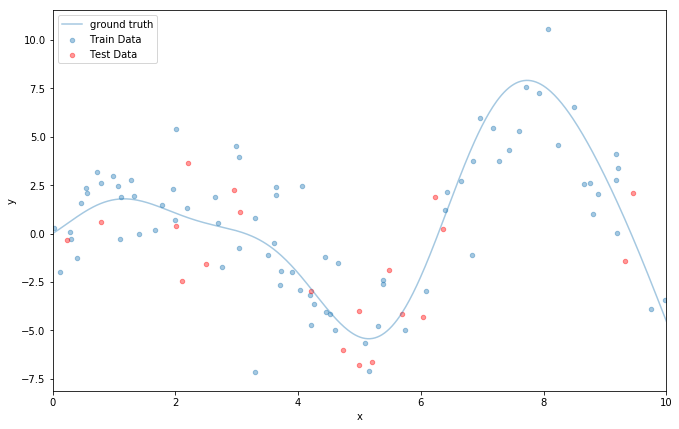

In [26]:
# plot ground truth
X_train, X_test, y_train, y_test = gen_data(100)
x_plot = np.linspace(0, 10, 500)
plot_data()

We manually generate a function with only one feature and randomly assign 20% of the data into testing dataset. In the following plot, we see that the higher the max_depth is, the more complex the model will be:

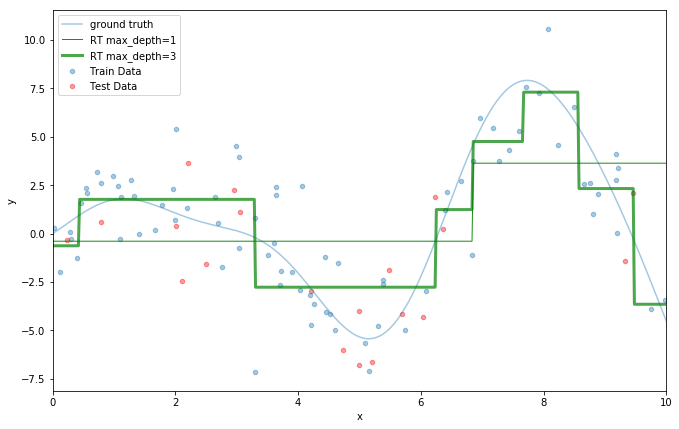

In [38]:
from sklearn.tree import DecisionTreeRegressor
plot_data()
est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=1', color='g', alpha=0.9, linewidth=1)

est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=3', color='g', alpha=0.7, linewidth=3)

plt.legend(loc='upper left')

**Fitting a model using Gradient Boosting Regressor**

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from itertools import islice

est = GradientBoostingRegressor(n_estimators=100, max_depth=1, learning_rate=1.0)
est.fit(X_train, y_train)

def plot_staged_predict(est):
    plot_data()
    ax = plt.gca()
    first = True

    # step through prediction as we add 10 more trees.
    # staged_predict return the Predicted regression target at each stage for X.
    # islice(array, start, end, by): therefore, we plot out the result starting from 0, ending to the number of n_estimators we have, by a number of 10.
    for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, est.n_estimators, 10): 
        plt.plot(x_plot, pred, color='r', alpha=0.2)
        if first:
            ax.annotate('High bias - low variance', xy=(x_plot[x_plot.shape[0] // 2],
                                                        pred[x_plot.shape[0] // 2]),
                                                        xytext=(4, 4), **annotation_kw)
            first = False

    pred = est.predict(x_plot[:, np.newaxis])
    plt.plot(x_plot, pred, color='r', label='GBRT max_depth=1')
    ax.annotate('Low bias - high variance', xy=(x_plot[x_plot.shape[0] // 2],
                                                pred[x_plot.shape[0] // 2]),
                                                xytext=(6.25, -6), **annotation_kw)
    plt.legend(loc='upper left')       

In [72]:
print(est)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=6,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=5, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)


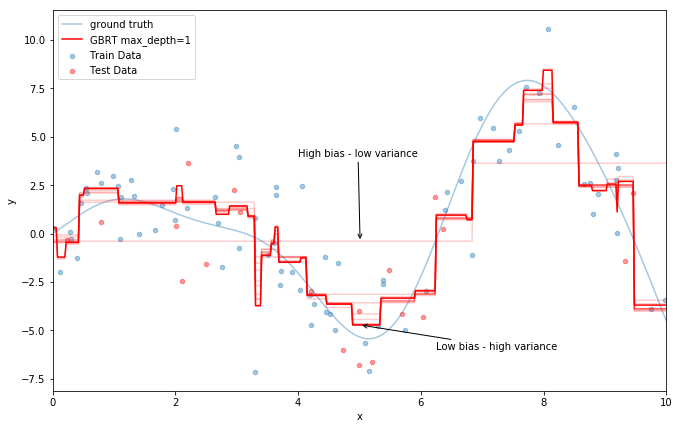

In [66]:
plot_staged_predict(est) 

The plot above is generated using n_estimator=100, which means the number of boosting stages to perform is 100, and in each stage, the depth of the tree is 1, i.e, in each stage, our tree is actually a stump, which only has a spliting node. We can see that the complexity of result of the gradient boosting tree is quite high. In GBRT, we use **n_estimator** and **max_depth** to control model complexity. To prevent us from overfitting and also have better model parameters, we can use `GRidSearchCV` from `sklearn.grid_search` to pick the best paramater generating by the highest score using cross-validation.

According to the [GBRT Tutorial](http://nbviewer.jupyter.org/github/pprett/pydata-gbrt-tutorial/blob/master/gbrt-tutorial.ipynb), they usually follow this recipe to tune the hyperparameters:

1. Pick n_estimators as large as (computationally) possible (e.g. 3000)
2. Tune max_depth, learning_rate, min_samples_leaf, and max_features via grid search
3. Increase n_estimators even more and tune learning_rate again holding the other parameters fixed


In [74]:
from sklearn.grid_search import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5], ## depends on the nr of training examples
              'subsample': [0.5, 1, 0.1]
              # 'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
              }

est = GradientBoostingRegressor(n_estimators=3000)
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, scoring='neg_mean_squared_error', n_jobs=4).fit(X_train, y_train)

# best hyperparameter setting
print('Best hyperparameters: %r' % gs_cv.best_params_)

Best hyperparameters: {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'subsample': 0.5}


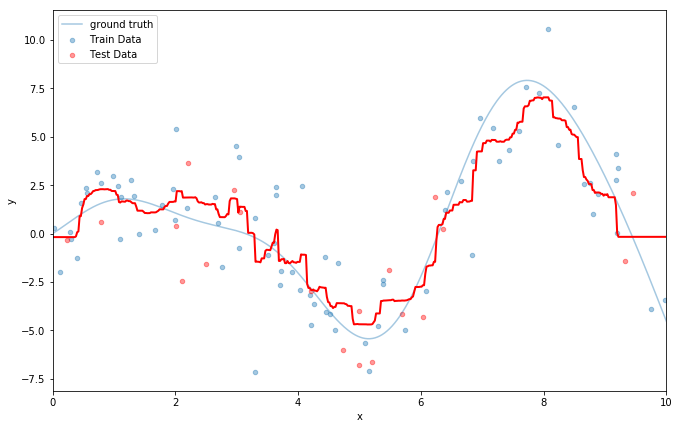

In [75]:
# refit model on best parameters
est.set_params(**gs_cv.best_params_)
est.fit(X_train, y_train)

# plot the approximation
plot_data()
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='r', linewidth=2)

From the above result, we can see that our best parameters are:

```Best hyperparameters: {'learning_rate': 0.001, 'max_depth': 4, 'min_samples_leaf': 3, 'subsample': 0.5}```

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. The best parameters are the one with the highest cross-validation score given all the other parameter fixed. Notice that when subsample smaller than the default 1.0, it results in Batch/Stochastic Gradient Boosting. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Thus, it will have lower chance of overfitting.

In the following post, we are going to discuss more about Gradient Boosting Machine by applying it to classification problems.

### Reference
* [Gradient Boosting wiki](https://en.wikipedia.org/wiki/Gradient_boosting)
* [A Gentle Introduction to Gradient Boosting](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf)
* [Gradient Descent wiki](https://en.wikipedia.org/wiki/Gradient_descent)
* [GRADIENT BOOSTING MACHINE (GBM) from Ethen](http://nbviewer.jupyter.org/github/ethen8181/machine-learning/blob/master/trees/gbm/gbm.ipynb)
* [GBRT Tutorial](http://nbviewer.jupyter.org/github/pprett/pydata-gbrt-tutorial/blob/master/gbrt-tutorial.ipynb)
* [intuitive-explanation-of-Gradient-Boosting](https://www.quora.com/What-is-an-intuitive-explanation-of-Gradient-Boosting)
* [Grid Search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)